*Класс по работе с тригонометрическими функциями*

In [39]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
import math

class Trigonometry:
    @staticmethod
    def cos(x):
        return math.cos(x)

    @staticmethod
    def sin(x):
        return math.sin(x)

    @staticmethod
    def tan(x):
        if math.cos(x) == 0:
            raise ValueError("Тангенс не определён для угла, где косинус равен нулю.")
        return math.tan(x)

    @staticmethod
    def arcsin(x):
        if x < -1 or x > 1:
            raise ValueError("Арксинус можно вычислить только для значения в диапазоне [-1, 1].")
        return math.asin(x)

    @staticmethod
    def arccos(x):
        if x < -1 or x > 1:
            raise ValueError("Арккосинус можно вычислить только для значения в диапазоне [-1, 1].")
        return math.acos(x)

    @staticmethod
    def arctan(x):
        return math.atan(x)

    @staticmethod
    def deg_to_rad(degrees):
        return math.radians(degrees)

angle_deg = 45
angle_rad = Trigonometry.deg_to_rad(angle_deg)

print(f"Косинус {angle_deg}°: {Trigonometry.cos(angle_rad)}")
print(f"Синус {angle_deg}°: {Trigonometry.sin(angle_rad)}")
print(f"Тангенс {angle_deg}°: {Trigonometry.tan(angle_rad)}")
print(f"Арксинус 0.5: {Trigonometry.arcsin(0.5)}")
print(f"Арккосинус 0.5: {Trigonometry.arccos(0.5)}")
print(f"Арктангенс 1: {Trigonometry.arctan(1)}")


Косинус 45°: 0.7071067811865476
Синус 45°: 0.7071067811865475
Тангенс 45°: 0.9999999999999999
Арксинус 0.5: 0.5235987755982989
Арккосинус 0.5: 1.0471975511965979
Арктангенс 1: 0.7853981633974483


In [41]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

tree = Tree('a', 
            Tree('b', 
                 Tree('d'), 
                 Tree('e')), 
            Tree('c', 
                 None, 
                 Tree('f')))

def get_root(tree):
    return tree.value

def get_left_subtree(tree):
    return tree.left

def get_right_subtree(tree):
    return tree.right

root_val = get_root(tree)
left_subtree = get_left_subtree(tree)
right_subtree = get_right_subtree(tree)

print(f"Корень дерева: {root_val}")
print(f"Левое поддерево: {left_subtree.value if left_subtree else 'None'}")
print(f"Правое поддерево: {right_subtree.value if right_subtree else 'None'}")


Корень дерева: a
Левое поддерево: b
Правое поддерево: c


In [42]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = Tree(data)
            else:
                self.left.insert(data)
        elif data > self.data:
            if self.right is None:
                self.right = Tree(data)
            else:
                self.right.insert(data)

    def PrintTree(self, level=0, prefix="Root: "):
        print(" " * (level * 4) + prefix + str(self.data))
        if self.left is not None:
            self.left.PrintTree(level + 1, "L--- ")
        if self.right is not None:
            self.right.PrintTree(level + 1, "R--- ")

root = Tree(10)
root.insert(6)
root.insert(14)
root.insert(3)
root.insert(8)
root.insert(12)
root.insert(16)

root.PrintTree()


Root: 10
    L--- 6
        L--- 3
        R--- 8
    R--- 14
        L--- 12
        R--- 16


*Классификатор на основе дерева принятия решений*

In [43]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1,1], [2,1], [3,2]])
target = [0, 0, 0, 1, 1, 1]

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X, target)
classifier

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[1] <= 0.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

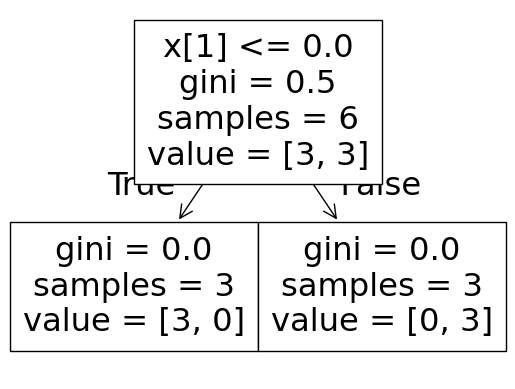

In [45]:
from sklearn import tree
tree.plot_tree(classifier)

In [46]:
x_test = np.array([[-5, -5], [5, 5]])
y_pred = classifier.predict(x_test)
y_pred

array([0, 1])

*Вино*

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [48]:
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
dataset = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [50]:
regressor = DecisionTreeRegressor(max_depth=7)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=7)

[Text(0.4413265306122449, 0.9375, 'x[10] <= 10.525\nsquared_error = 0.671\nsamples = 1279\nvalue = 5.647'),
 Text(0.15518707482993196, 0.8125, 'x[9] <= 0.575\nsquared_error = 0.431\nsamples = 789\nvalue = 5.373'),
 Text(0.29825680272108845, 0.875, 'True  '),
 Text(0.06972789115646258, 0.6875, 'x[4] <= 0.251\nsquared_error = 0.329\nsamples = 323\nvalue = 5.164'),
 Text(0.06292517006802721, 0.5625, 'x[1] <= 0.587\nsquared_error = 0.316\nsamples = 322\nvalue = 5.171'),
 Text(0.04421768707482993, 0.4375, 'x[10] <= 10.05\nsquared_error = 0.338\nsamples = 148\nvalue = 5.284'),
 Text(0.027210884353741496, 0.3125, 'x[4] <= 0.08\nsquared_error = 0.267\nsamples = 114\nvalue = 5.175'),
 Text(0.013605442176870748, 0.1875, 'x[7] <= 0.996\nsquared_error = 0.38\nsamples = 58\nvalue = 5.293'),
 Text(0.006802721088435374, 0.0625, 'squared_error = 0.196\nsamples = 15\nvalue = 4.933'),
 Text(0.02040816326530612, 0.0625, 'squared_error = 0.383\nsamples = 43\nvalue = 5.419'),
 Text(0.04081632653061224, 0.1

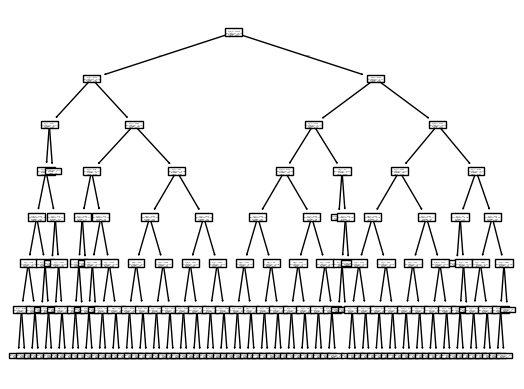

In [51]:
tree.plot_tree(regressor)

In [52]:
y_pred = regressor.predict(X_test)
y_pred

array([5.16666667, 5.0952381 , 6.66      , 5.0952381 , 5.52816901,
       5.27777778, 5.52816901, 6.25      , 5.0952381 , 5.27777778,
       5.07272727, 5.52816901, 5.7       , 4.        , 5.52816901,
       5.16666667, 7.04761905, 5.65517241, 5.        , 5.0952381 ,
       6.83333333, 5.52816901, 5.65517241, 4.        , 4.        ,
       5.0952381 , 5.41860465, 6.66      , 5.07272727, 6.2       ,
       5.1       , 5.16666667, 6.        , 5.8375    , 6.        ,
       5.9       , 5.27777778, 6.        , 6.07692308, 5.7       ,
       5.41860465, 6.03448276, 7.        , 6.66      , 5.7       ,
       5.0952381 , 4.93333333, 6.25      , 4.        , 5.16666667,
       5.41860465, 5.07272727, 5.52816901, 6.07692308, 5.4       ,
       5.0952381 , 5.        , 5.0952381 , 6.66      , 5.8375    ,
       5.05882353, 5.65517241, 5.7       , 6.2       , 5.0952381 ,
       6.03448276, 5.0952381 , 5.16666667, 7.75      , 6.        ,
       6.        , 5.91666667, 5.0952381 , 5.27777778, 6.     

In [53]:
df = pd.DataFrame({'Actual' : Y_test, 'Preticted' : y_pred})
df

,Actual,Preticted
0,6,5.166667
1,5,5.095238
2,7,6.660000
3,6,5.095238
4,5,5.528169
...,...,...
315,6,6.000000
316,4,5.700000
317,5,6.300000
318,4,5.095238


In [54]:
from sklearn import metrics
print('MSE: ', metrics.mean_squared_error(Y_test, y_pred))

MSE:  0.46785784583478607
